**Вариант 4**

**Необходимые библиотеки**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 3.1.4**

In [ ]:
N = 4 # номер варианта
n = 7 # коэф



b = np.full(n, N, dtype=float) # вектор b
A = np.zeros((n, n)) # нулевая матрица

'''
Заполним коэф матрицы А
'''

for i in range(n):
  for j in range(n):
    с = 0.1 * N * (i + 1) * (j + 1)
    a = 55 / (с**2 +3*с+100)
    A[i][j] = a

In [ ]:
x = np.linalg.solve(A, b) # решим систему лин. уравнений
x # найденный x-вектор

array([ 21.42617103, -36.01188314,  49.15018933, -49.51391554,
        32.05364783, -11.09060325,   1.26654193])

In [ ]:
np.linalg.cond(A)

4333277.062952723

In [ ]:
delta = 0.001 # погрешность
d = np.zeros(n) # создаёт нулевой вектор размерности n
for k in range(n):
  bi = np.copy(b) # копируем вектор
  bi[k] += delta

  xi = np.linalg.solve(A, bi) # решаем систему с изменённым вектором b

  #представление (положительной) бесконечности с плавающей запятой - np.inf

  di = np.linalg.norm(x - xi, np.inf) / np.linalg.norm(x, np.inf)
  d[k] = di
d

array([ 0.52699638,  2.81031462,  7.44585892, 11.97334131, 11.97334131,
        6.71480863,  1.59357141])

In [ ]:
# пункт 5. Оценка между дельта погрешностью и со значением d погрешности

print(f"δ(x^m) <= cond(A) · δ(b^m)")
for m in range(n):
  print(f"{d[m]} <= {np.linalg.cond(A) * delta / np.linalg.norm(b, np.inf)} ")

δ(x^m) <= cond(A) · δ(b^m)
0.5269963758139323 <= 1083.3192657381808 
2.810314615518679 <= 1083.3192657381808 
7.445858923813933 <= 1083.3192657381808 
11.973341313702303 <= 1083.3192657381808 
11.973341313684882 <= 1083.3192657381808 
6.714808634706409 <= 1083.3192657381808 
1.5935714121103537 <= 1083.3192657381808 


**Задание 3.2**

In [ ]:
'''

исследовать зависимость погрешности решения
системы от погрешностей коэффициентов матрицы A

'''


d = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    Aij = A.copy()
    Aij[i][j] += delta
    xij = np.linalg.solve(Aij, b)
    dij = np.linalg.norm(xij - x, np.inf) / np.linalg.norm(x, np.inf)
    d[i][j] = dij
print(d)

[[ 6.81957461  6.51291439  1.99042875  1.20208476  0.6234728   0.37540538
   0.12286096]
 [20.66433426  4.22521918  2.04152443  1.09858524  0.65205243  0.36304933
   0.17151677]
 [12.25951201  3.96310044  1.83723675  1.06256019  0.64561527  0.38572316
   0.1751341 ]
 [11.81843904  3.40418178  1.69610223  1.0129396   0.64846026  0.39820374
   0.19465941]
 [ 9.46874343  3.12112606  1.5919231   1.00168963  0.66173214  0.42362777
   0.2056974 ]
 [ 9.24093482  2.81666373  1.54157471  0.99700129  0.6866335   0.44428852
   0.23092492]
 [ 6.28496416  2.76534581  1.45456475  1.01283632  0.69285582  0.47989286
   0.21286861]]


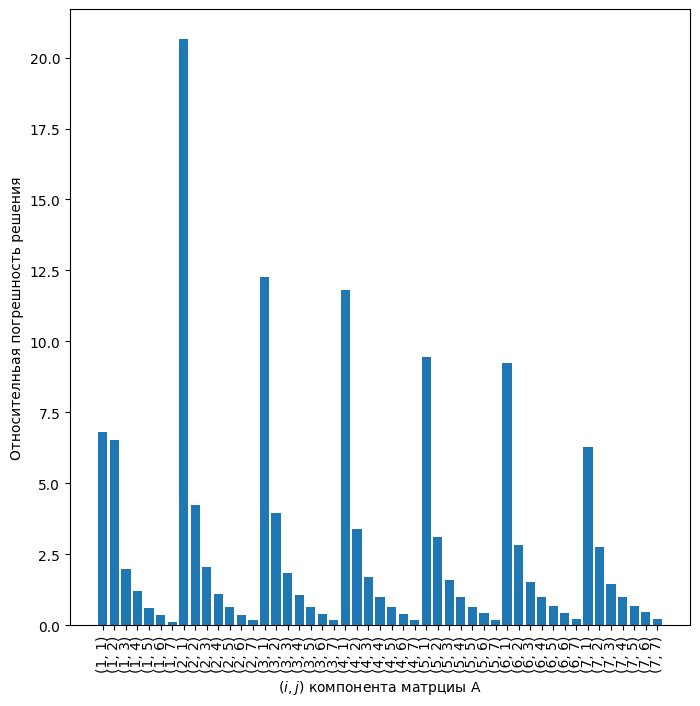

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar([f"({i // n + 1}, {i % n + 1})" for i in range(n*n)], d.flatten())
plt.xticks(rotation=90)
plt.xlabel("$(i, j)$ компонента матрциы A")
plt.ylabel("Относителньая погрешность решения")
fig.show()

In [ ]:
print("δ(x*) <= cond(A) · δ(A*)")
print(f"{d.max()} <= {np.linalg.cond(A) * delta / np.linalg.norm(A, np.inf)} ")

δ(x*) <= cond(A) · δ(A*)
20.664334263317052 <= 1213.0026568686974 


**Задание 3.7**

In [ ]:
# LU-разложение
def lu_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for j in range(n):
        L[j, j] = 1
        for i in range(j + 1):
            U[i, j] = A[i, j] - sum(U[k, j] * L[i, k] for k in range(i))
        for i in range(j, n):
            L[i, j] = (A[i, j] - sum(U[k, j] * L[i, k] for k in range(j))) / U[j, j]

    return L, U

# нахождение обратной матрицы
def inverse_matrix(A):
    L, U = lu_decomposition(A)
    n = len(A)
    inv_A = np.zeros((n, n))

    for i in range(n):
        b = np.zeros(n)
        b[i] = 1
        y = np.linalg.solve(L, b)
        x = np.linalg.solve(U, y)
        inv_A[:, i] = x

    return inv_A


def condition_number(A):
    inv_A = inverse_matrix(A)
    norm_A = np.linalg.norm(A)
    norm_inv_A = np.linalg.norm(inv_A)
    cond_A = norm_A * norm_inv_A
    return cond_A

In [ ]:
# Задаем максимальный порядок матрицы
k = 7
orders = list(range(1, k+1))
cond_numbers = [] # Матрицы для хранения чисел обусловленности
n_values = range(1, k)



for n in orders:
    A_tmp = np.copy(A[:n,:n]) # порядок матрицы
    cond_A = condition_number(A_tmp)
    cond_numbers.append(cond_A)

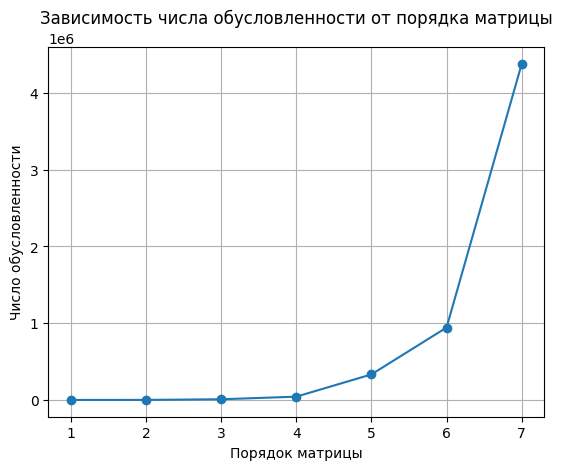

In [ ]:
# Построение графика
plt.plot(orders, cond_numbers, marker='o')
plt.xlabel('Порядок матрицы')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности от порядка матрицы')
plt.grid(True)
plt.show()